In [ ]:
# This notebook is a study of how data is mapped to higher dimension. 
# This study will be later generalised on other datasets by making the use of Wire Crosstalk for transforming data.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('datasets/demo_data.csv')

In [10]:
data

,x1,x2,y
0,-5,2,1
1,-4,2,1
2,-3,2,1
3,-2,2,0
4,-1,2,0
5,0,2,0
6,1,2,0
7,2,2,0
8,3,2,1
9,4,2,1


The data is 11 points in 1D space.  
Note: A constant feature x2 has been added so as to visualise the data efficiently.

### Visualising the data in 1D

<Figure size 432x288 with 0 Axes>

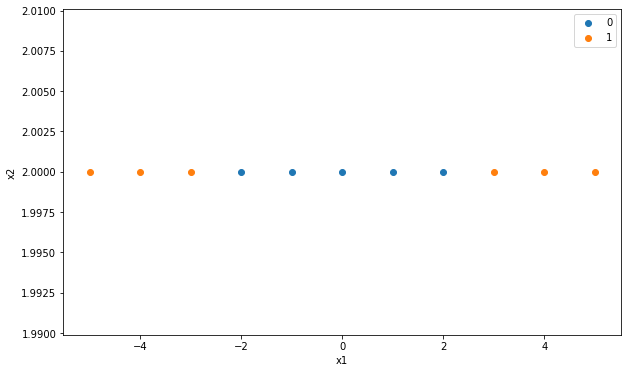

In [9]:
plt.clf()
plt.figure(figsize = (10, 6))
names = ['0','1']
colors = ['b','r']
label = (data['y']).astype(np.int)
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
for i in range(len(names)):
    bucket = data[data['y'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend()
plt.show()

Clearly, there is no seperating linear hyperplane which can classify this data in 1D space.

Let's verify this by Linear Programming

In [23]:
# used a for loop - for future use, when there will be multiclass classifcation
from scipy.optimize import linprog
 
dic = {0: '0', 1: '1'}
 
for i in dic.keys():
    data["newTarget"] = np.where(data['y'] == i, 1 , -1)
     
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    tmp = data.iloc[:,[0,1]].values
    tmp = sc.fit_transform(tmp)
 
    xx = np.array(data.newTarget.values.reshape(-1,1) * tmp)
    t = np.where(data['y'] == i, 1 , -1)
     
    #2-D array which, when matrix-multiplied by x, gives the values of 
    #the upper-bound inequality constraints at x.
    A_ub = np.append(xx, t.reshape(-1,1), 1)
     
    #1-D array of values representing the upper-bound of each 
    #inequality constraint (row) in A_ub.
    b_ub = np.repeat(-1, A_ub.shape[0]).reshape(-1,1)
     
    # Coefficients of the linear objective function to be minimized.
    c_obj = np.repeat(1, A_ub.shape[1])
    res = linprog(c=c_obj, A_ub=A_ub, b_ub=b_ub,
                  options={"disp": False})
     
    if res.success:
        print('There is linear separability')
    else:
        print('No linear separability')
    break #remove break in case of multiclass classification 

No linear separability


/Users/ambuj/Documents/MS Stuff/ml_cs_6350/ML_Project/env_ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Let's try to separate the data using SVM

### SVM for transformed data in 1D

In [44]:
# Define our X and Y (Dependent and Target Variables)
x = data.iloc[:, [0,1]].values
y = data.iloc[:,3]

Linear Kernel

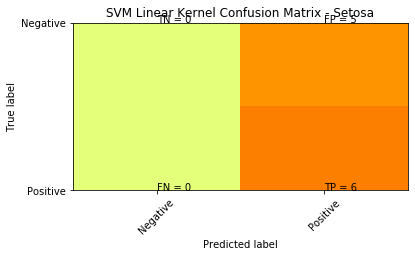

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


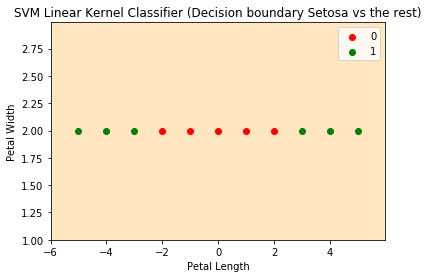

In [45]:
# Confusion Matrix for SVM with Linear Kernel
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='linear', random_state=0)
svm.fit(x, y)
 
predicted = svm.predict(x)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predicted)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM Linear Kernel Confusion Matrix - Setosa')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Plot our decision boundary for SVM with Linear Kernel
from matplotlib.colors import ListedColormap
plt.clf()
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navajowhite', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Linear Kernel Classifier (Decision boundary Setosa vs the rest)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

RBF Kernel

/Users/ambuj/Documents/MS Stuff/ml_cs_6350/ML_Project/env_ml/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


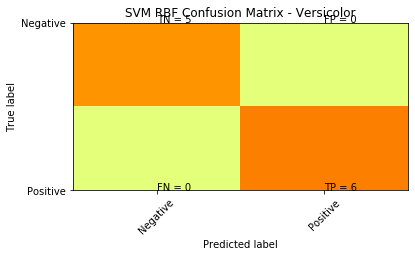

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


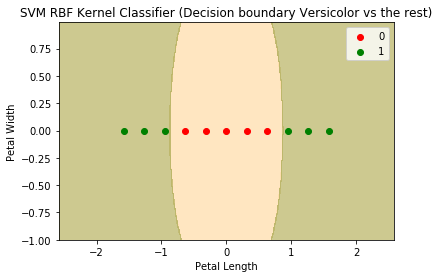

In [46]:
# Confusion Matrix for SVM with RBG Kernel
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
 
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0)
svm.fit(x, y)
 
predicted = svm.predict(x)
 
cm = confusion_matrix(y, predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM RBF Confusion Matrix - Versicolor')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Plot our decision boundary for SVM with RBF Kernel
from matplotlib.colors import ListedColormap
plt.clf()
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navajowhite', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM RBF Kernel Classifier (Decision boundary Versicolor vs the rest)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

The Linear Kernel could not find a separating hyperplane, as expected.   
However, RBF kernel did find a hyperplane but this hyperplane is not linear.

So, we will make a new feature x1^2 which will transfrom the data from 1D to 2D

In [18]:
data['x1^2'] = data['x1'] ** 2
data = data[['x1', 'x2', 'x1^2', 'y']]

In [19]:
data

,x1,x2,x1^2,y
0,-5,2,25,1
1,-4,2,16,1
2,-3,2,9,1
3,-2,2,4,0
4,-1,2,1,0
5,0,2,0,0
6,1,2,1,0
7,2,2,4,0
8,3,2,9,1
9,4,2,16,1


### Visualising the data in 2D

<Figure size 432x288 with 0 Axes>

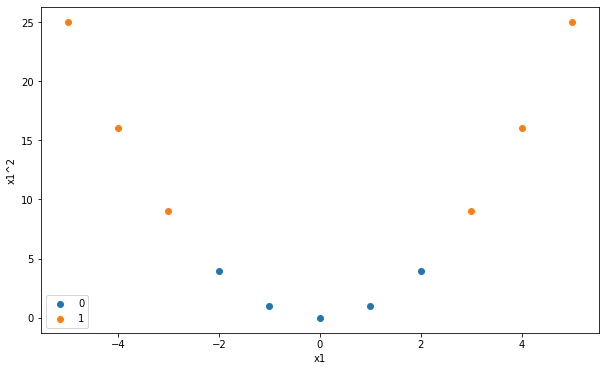

In [20]:
plt.clf()
plt.figure(figsize = (10, 6))
names = ['0','1']
colors = ['b','r']
label = (data['y']).astype(np.int)
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[2])
for i in range(len(names)):
    bucket = data[data['y'] == i]
    bucket = bucket.iloc[:,[0,2]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend()
plt.show()

Clearly, there is seperating linear hyperplane which can classify this data in 2D space.

Let's verify this by Linear Programming

In [25]:
# used a for loop - for future use, when there will be multiclass classifcation
from scipy.optimize import linprog
 
dic = {0: '0', 1: '1'}
 
for i in dic.keys():
    data["newTarget"] = np.where(data['y'] == i, 1 , -1)
     
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    tmp = data.iloc[:,[0,2]].values
    tmp = sc.fit_transform(tmp)
 
    xx = np.array(data.newTarget.values.reshape(-1,1) * tmp)
    t = np.where(data['y'] == i, 1 , -1)
     
    #2-D array which, when matrix-multiplied by x, gives the values of 
    #the upper-bound inequality constraints at x.
    A_ub = np.append(xx, t.reshape(-1,1), 1)
     
    #1-D array of values representing the upper-bound of each 
    #inequality constraint (row) in A_ub.
    b_ub = np.repeat(-1, A_ub.shape[0]).reshape(-1,1)
     
    # Coefficients of the linear objective function to be minimized.
    c_obj = np.repeat(1, A_ub.shape[1])
    res = linprog(c=c_obj, A_ub=A_ub, b_ub=b_ub,
                  options={"disp": False})
     
    if res.success:
        print('There is linear separability')
    else:
        print('No linear separability')
    break #remove break in case of multiclass classification 

There is linear separability


/Users/ambuj/Documents/MS Stuff/ml_cs_6350/ML_Project/env_ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### SVM for transformed data in 2D

In [41]:
# Define our X and Y (Dependent and Target Variables)
x = data.iloc[:, [0,2]].values
y = data.iloc[:,3]

Linear Kernel

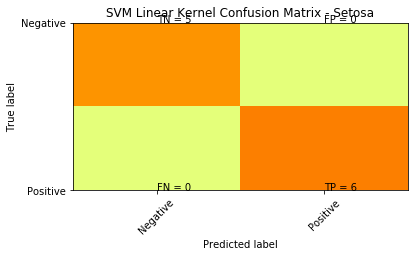

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


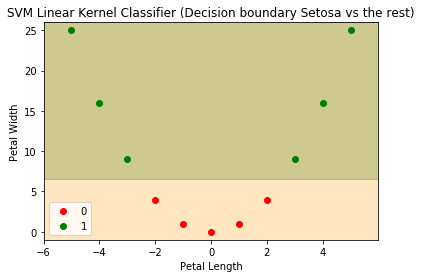

In [42]:
# Confusion Matrix for SVM with Linear Kernel
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='linear', random_state=0)
svm.fit(x, y)
 
predicted = svm.predict(x)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predicted)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM Linear Kernel Confusion Matrix - Setosa')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Plot our decision boundary for SVM with Linear Kernel
from matplotlib.colors import ListedColormap
plt.clf()
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navajowhite', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Linear Kernel Classifier (Decision boundary Setosa vs the rest)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

RBF Kernel

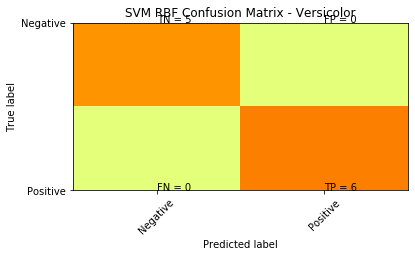

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


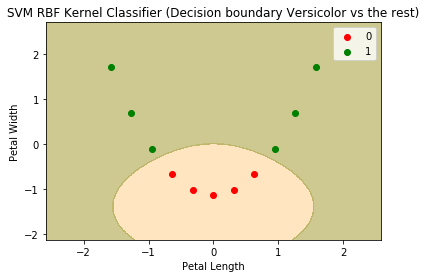

In [43]:
# Confusion Matrix for SVM with RBG Kernel
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
 
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0)
svm.fit(x, y)
 
predicted = svm.predict(x)
 
cm = confusion_matrix(y, predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM RBF Confusion Matrix - Versicolor')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Plot our decision boundary for SVM with RBF Kernel
from matplotlib.colors import ListedColormap
plt.clf()
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navajowhite', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM RBF Kernel Classifier (Decision boundary Versicolor vs the rest)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

Here, the Linear Kernel is able to find a separating hyperplane to separate the data.